In [1]:
from __future__ import print_function
%matplotlib inline
import random
import os
import numpy as np
import cv2
import torch
from skimage import io
from tqdm import tqdm
import matplotlib.pyplot as plt
import sewar.full_ref as fr

In [25]:
def rename_save(filename, input_dir, out_dir, scale=10000.):
    """
    convert .tif (landsat/sentinal) uint16 [0-10000] to float32 [0, 1]
    """
    #fn = filename.split(".")
    file = input_dir + filename
    img = io.imread(file)
    img[img < 0] = 1
    img[img > scale] = scale
    img = img.astype(np.float32) / scale
    
    if not os.path.exists(out_dir):
        os.mkdir(out_dir)
    #else:
        #print("Warning: dir {} already exists".format(out_dir))

    out_f = "{}/{}".format(out_dir, filename)   
    io.imsave(out_f, img)

In [3]:
def split_data_percent(percent, input_dir, test_num = 0):
    """
    split data into train, validation and test. 
    
    percent: precent of training data. percent of val is 1 - percent.
    test_num: number of images in test. 

    """
    
    filenames = os.listdir(input_dir)
    #print(len(filenames))
    
    random.seed(100)  #230
    filenames.sort()
    random.shuffle(filenames)
    
    test_filenames = filenames[:test_num]

    split = int(percent * (len(filenames) - test_num))

    train_filenames = filenames[test_num : test_num + split]
    val_filenames = filenames[test_num + split:]
    
    
    filename_dic = {"train_filenames": train_filenames,
                   "val_filenames": val_filenames,
                   "test_filenames": test_filenames}
    return filename_dic

In [33]:
def split_data(train_num=0, val_num=0, test_num=0, input_dir=None):
    """
    split data into train, test and val.
    val_num: number of images in val
    test_num: number of images in test
    """
    filenames = os.listdir(input_dir)
    #print(len(filenames))
    
    random.seed(10)  #230
    filenames.sort()
    random.shuffle(filenames)
    
    if train_num is not 0:
        split = train_num
        print(split)
    else:
        split = len(filenames) - val_num - test_num
        print(split)

    train_filenames = filenames[:split]
    val_filenames = filenames[split:split+val_num]
    test_filenames = filenames[split+val_num:split+val_num+test_num]
    
    print(len(train_filenames), len(val_filenames), len(test_filenames))
    #print(val_filenames)
    #print(test_filenames)
    filename_dic = {"train_filenames": train_filenames,
                   "val_filenames": val_filenames,
                   "test_filenames": test_filenames}
    return filename_dic

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2383
3334 0
image (160, 160, 3) uint16


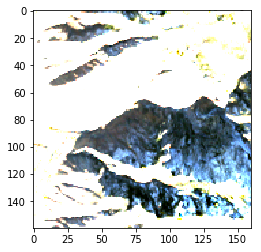

In [9]:
### Image visualization
data_dir_HR = "/home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/High-Sentinel/"
data_dir_x3 = "/home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/Low-Landsat/"

data_dir = data_dir_x3

filenames = os.listdir(data_dir)
print(len(filenames))

files = [os.path.join(data_dir, f) for f in filenames]
#print(files[0:2])

# img = io.imread(files[140])
# print(np.max(img), np.min(img))
# print("image", img.shape, img.dtype)
# plt.imshow(img)

In [15]:
### convert Landsat/Sentinal datasets from uint16 [0-10000] to float32 [0-1], split data into train/dev/test
data_dir_HR = "/home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Training-1223/HR/"
data_dir_x3 = "/home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Training-1223/LR-x3/"

output_dir = "/home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/"

Sentinel = split_data_percent(0.9, data_dir_HR, 57)

for dirc in ['train', 'val', 'test']:
    out_dir_HR = output_dir + "{}/HR".format(dirc)
    out_dir_x3 = output_dir + "{}/x3".format(dirc)
    if not os.path.exists(out_dir_HR):
        os.mkdir(out_dir_HR)
    if not os.path.exists(out_dir_x3):
        os.mkdir(out_dir_x3)
    #print(out_dir_HR, out_dir_x3)
    #in_dir_HR_L = data_dir_L + "{}/{}-HR/".format(dirc, dirc)
    #in_dir_x4_L = data_dir_L + "{}/{}-LRx4/".format(dirc, dirc)
    
#     for filename in tqdm(NAIP["{}_filenames".format(dirc)]):
#         rename_save(filename, data_dir_HR_N, out_dir_HR, 255.)
#         x4_name = "x4_" + filename
#         #print(x4_file)
#         rename_save(x4_name, data_dir_x4_N, out_dir_x4, 255.)

    for filename in tqdm(Sentinel["{}_filenames".format(dirc)]):
        rename_save(filename, data_dir_HR, out_dir_HR, 10000.)
        name = filename.split("_")[1]
        x3_name = "LRx3_" + name
        #print(x3_name)
        rename_save(x3_name, data_dir_x3, out_dir_x3, 10000.)

  1%|          | 10/1098 [00:00<00:38, 27.93it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_986.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_986.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
  1%|▏         | 14/1098 [00:00<00:37, 29.08it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_995.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_995.tif is a lo

  8%|▊         | 83/1098 [00:02<00:35, 28.84it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_1155.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_1155.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_803.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_803.tif is a low contrast image
  warn('%s is a low contrast i

 14%|█▍        | 155/1098 [00:05<00:34, 27.54it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_1049.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_1151.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_1151.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 15%|█▍        | 161/1098 [00:05<00:34, 26.88it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_794.tif is

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_567.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 22%|██▏       | 245/1098 [00:08<00:29, 28.49it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_1135.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_1135.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_77.tif is a low contrast image
  warn('%s is a low contrast

 34%|███▎      | 368/1098 [00:12<00:24, 29.33it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_1028.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_1028.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 34%|███▍      | 371/1098 [00:13<00:26, 27.90it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_1115.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_1115.tif i

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_646.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_646.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 45%|████▍     | 494/1098 [00:17<00:22, 26.56it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_1237.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 45%|████▌     | 497/1098 [00:17<00:22, 26.70it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_1044.tif is 

 51%|█████▏    | 565/1098 [00:20<00:19, 27.11it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_915.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_915.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 52%|█████▏    | 568/1098 [00:20<00:19, 26.75it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_718.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_718.tif is a 

 59%|█████▉    | 651/1098 [00:23<00:15, 28.92it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_801.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_801.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 60%|█████▉    | 654/1098 [00:23<00:16, 27.73it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_887.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_887.tif is a 

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_844.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 65%|██████▍   | 709/1098 [00:25<00:14, 26.48it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_756.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_756.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_1262.tif is a low contrast image
  warn('%s is a low contrast i

 76%|███████▌  | 837/1098 [00:29<00:09, 28.04it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_1168.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_1114.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_1114.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 77%|███████▋  | 840/1098 [00:29<00:09, 27.23it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_184.tif is

 81%|████████▏ | 893/1098 [00:31<00:07, 26.20it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_1238.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_1238.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_997.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_997.tif is a low contrast image
  warn('%s is a low contrast 

 88%|████████▊ | 967/1098 [00:34<00:04, 29.62it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_1219.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_525.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_525.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 88%|████████▊ | 971/1098 [00:34<00:04, 30.50it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_1018.tif is 

 94%|█████████▍| 1031/1098 [00:37<00:02, 28.26it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_78.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 94%|█████████▍| 1035/1098 [00:37<00:02, 29.51it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_692.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_692.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_1132.tif is 

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/HR/HR_846.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/train/x3/LRx3_846.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
  0%|          | 0/122 [00:00<?, ?it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/val/HR/HR_1066.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/val/x3/LRx3_1066.tif is a low contrast image
  warn('%s is a low contrast image' % fname)

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/val/HR/HR_822.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/val/x3/LRx3_822.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 60%|█████▉    | 73/122 [00:03<00:01, 26.35it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/val/x3/LRx3_870.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 62%|██████▏   | 76/122 [00:03<00:01, 26.50it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/val/HR/HR_1046.tif is a low contras

 47%|████▋     | 27/57 [00:00<00:01, 28.73it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/test/x3/LRx3_183.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 58%|█████▊    | 33/57 [00:01<00:00, 28.38it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/test/HR/HR_1159.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Sentinel_Landsat/test/x3/LRx3_1159.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 63%|██████▎   | 36/57 [00:01<00:00, 28.65it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/Se

1098
1.0 0.0252
image (480, 480, 3) float32


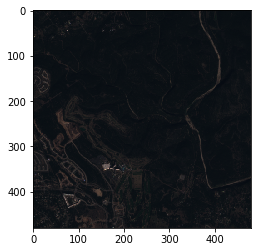

In [42]:
## image visualization

folders = ["train", "test", "val"]
subfs = ["HR", "x3"]
folder = folders[0]
subf = subfs[0]
output_dir = "/home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/" + "{}/{}".format(folder, subf)

filenames = os.listdir(output_dir)
print(len(filenames))

files = [os.path.join(output_dir, f) for f in filenames]

img = io.imread(files[1])
print(np.max(img), np.min(img))
print("image", img.shape, img.dtype)
plt.imshow(img)

In [35]:
## split sentinel-landsat dataset into the same number with sentinel experiment
## train: 1098, val: 122, test: 57

### convert Landsat-Sentinal datasets from uint16 [0-10000] to float32 [0-1], split data into train/dev/test
data_dir_HR = "/home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/High-Sentinel/"
data_dir_x3 = "/home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/Low-Landsat/"

output_dir = "/home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/"

if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    os.mkdir(output_dir + "train")
    os.mkdir(output_dir + "test")
    os.mkdir(output_dir + "val")

Sentinel = split_data(train_num=1098, val_num=122, test_num=57, input_dir=data_dir_HR)

for dirc in ['train', 'val', 'test']:
    out_dir_HR = output_dir + "{}/HR".format(dirc)
    out_dir_x3 = output_dir + "{}/x3".format(dirc)
    if not os.path.exists(out_dir_HR):
        os.mkdir(out_dir_HR)
    if not os.path.exists(out_dir_x3):
        os.mkdir(out_dir_x3)
    #print(out_dir_HR, out_dir_x3)
    #in_dir_HR_L = data_dir_L + "{}/{}-HR/".format(dirc, dirc)
    #in_dir_x4_L = data_dir_L + "{}/{}-LRx4/".format(dirc, dirc)
    
#     for filename in tqdm(NAIP["{}_filenames".format(dirc)]):
#         rename_save(filename, data_dir_HR_N, out_dir_HR, 255.)
#         x4_name = "x4_" + filename
#         #print(x4_file)
#         rename_save(x4_name, data_dir_x4_N, out_dir_x4, 255.)

    for filename in tqdm(Sentinel["{}_filenames".format(dirc)]):
        rename_save(filename, data_dir_HR, out_dir_HR, 10000.)
        name = filename.split("_")[1]
        x3_name = "landsat_" + name
        #print(x3_name)
        rename_save(x3_name, data_dir_x3, out_dir_x3, 10000.)

  0%|          | 0/1098 [00:00<?, ?it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1263.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1263.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1428.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1428.tif is a low co

1098
1098 122 57


/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_877.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_877.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1435.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1435.tif is a low contrast image
  warn('%s is a low contrast 

  4%|▍         | 43/1098 [00:00<00:18, 58.56it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_2034.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_2034.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1001.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1001.tif is

  6%|▋         | 69/1098 [00:01<00:17, 60.14it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_859.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_859.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1213.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1213.tif is a

  9%|▉         | 104/1098 [00:01<00:16, 61.89it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1573.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1573.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1747.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1357.tif 

 14%|█▍        | 153/1098 [00:02<00:15, 61.63it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1316.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1316.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_964.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_964.tif is 

 17%|█▋        | 188/1098 [00:03<00:15, 60.14it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1508.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1508.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1189.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1189.tif i

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_708.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1212.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1212.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 21%|██▏       | 234/1098 [00:03<00:14, 59.32it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_2060.tif is

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1765.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1765.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1777.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1777.tif is a low contrast image
  warn('%s is a low contras

 28%|██▊       | 306/1098 [00:05<00:13, 60.36it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_896.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_896.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1230.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1230.tif is 

 32%|███▏      | 346/1098 [00:05<00:12, 59.79it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1348.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1348.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1338.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1338.tif i

 35%|███▌      | 388/1098 [00:06<00:11, 61.41it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_768.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_768.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_663.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_663.tif is a 

 39%|███▊      | 423/1098 [00:07<00:10, 61.50it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_714.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_714.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_2031.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_2031.tif is 

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1442.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1442.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1145.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1145.tif is a low contrast image
  warn('%s is a low contras

 45%|████▍     | 493/1098 [00:08<00:09, 60.69it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_114.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_114.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_802.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_802.tif is a 

 48%|████▊     | 528/1098 [00:08<00:09, 60.58it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_887.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_887.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_2267.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_2267.tif is 

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_758.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_758.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_2048.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1120.tif is a low contrast image
  warn('%s is a low contrast

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_604.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_604.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1367.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1367.tif is a low contrast image
  warn('%s is a low contrast 

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1241.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1241.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_833.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 59%|█████▉    | 652/1098 [00:10<00:07, 60.92it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_2362.tif is

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_116.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_2319.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_2319.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_2259.tif is a low contrast image
  warn('%s is a low contrast

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1035.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 65%|██████▌   | 715/1098 [00:11<00:06, 60.76it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_788.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_788.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_526.tif is 

 68%|██████▊   | 743/1098 [00:12<00:05, 61.07it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1355.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1355.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1143.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1143.tif i

 70%|███████   | 771/1098 [00:12<00:05, 60.91it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_979.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_979.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1507.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1507.tif is 

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1397.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1397.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_649.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_649.tif is a low contrast image
  warn('%s is a low contrast 

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1190.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1190.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 78%|███████▊  | 855/1098 [00:14<00:03, 60.90it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1460.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1172.tif 

 82%|████████▏ | 904/1098 [00:14<00:03, 60.46it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1222.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1222.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_647.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_647.tif is 

 86%|████████▌ | 946/1098 [00:15<00:02, 60.48it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1426.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1426.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 87%|████████▋ | 953/1098 [00:15<00:02, 60.44it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1695.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/se

 90%|█████████ | 992/1098 [00:16<00:01, 59.71it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_831.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_831.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_2300.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_2300.tif is 

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1043.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1043.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_709.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_709.tif is a low contrast image
  warn('%s is a low contrast 

 96%|█████████▌| 1054/1098 [00:17<00:00, 60.57it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1971.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1098.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1098.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_2376.tif

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1197.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1197.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 99%|█████████▉| 1089/1098 [00:18<00:00, 61.10it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/HR/sentinel_1685.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/train/x3/landsat_1685.tif 

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/val/HR/sentinel_1242.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/val/x3/landsat_1242.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/val/HR/sentinel_609.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 29%|██▊       | 35/122 [00:00<00:01, 61.71it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/val/HR/sentinel_1667.tif is a low co

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/val/HR/sentinel_323.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/val/x3/landsat_323.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 56%|█████▌    | 68/122 [00:01<00:00, 60.84it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/val/HR/sentinel_827.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/val/x3/landsat_827.tif is a low contra

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/val/HR/sentinel_239.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/val/HR/sentinel_667.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/val/x3/landsat_667.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 87%|████████▋ | 106/122 [00:01<00:00, 59.67it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/val/HR/sentinel_982.tif is a low cont

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/test/x3/landsat_625.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/test/HR/sentinel_1411.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/test/x3/landsat_1411.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 37%|███▋      | 21/57 [00:00<00:00, 60.50it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/test/x3/landsat_502.tif is a low co

/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/test/HR/sentinel_2025.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/test/x3/landsat_2025.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
 98%|█████████▊| 56/57 [00:00<00:00, 61.35it/s]/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/test/HR/sentinel_1246.tif is a low contrast image
  warn('%s is a low contrast image' % fname)
/home/ehlab/anaconda3/lib/python3.7/site-packages/skimage/io/_io.py:140: UserWarning: /home/ehlab/Desktop/RS_SR/SR_RemoteSensing/data/sentinel-landsat/splited/test/x3/landsat_1246.tif is a low